In [1]:
from PIL import Image, ImageDraw, ImageFont, ImageColor
import os
import csv

def calculate_text_size(text, font):
    # calculate text size based on font properties
    ascent, descent = font.getmetrics()
    text_width = font.getmask(text).getbbox()[2]
    text_height = ascent + descent
    return text_width, text_height

def get_brightness(color):
    # Calculate brightness of a color (grayscale value) for the text
    r, g, b = ImageColor.getrgb(color)
    return (r * 299 + g * 587 + b * 114) / 1000 


def visualize_image(filename, csv_filename):
        # Open image
        image_path = filename
        img = Image.open(image_path)
        draw = ImageDraw.Draw(img)

        # Read bounding box information from CSV file
        if os.path.getsize(csv_filename) > 0:
            with open(csv_filename, 'r') as csvfile:
                csvreader = csv.reader(csvfile)
                #next(csvreader)  # Skip header row
                for row in csvreader:
                    if row:
                        xmin, ymin, xmax, ymax = map(int, row[0:4])
                        class_name = row[4]
        
                        # Define colors for different classes
                        class_colors = {
                            'danger': 'yellow',
                            'interdiction': 'purple',
                            'obligation': 'blue',
                            'stop': 'magenta',
                            'ceder': 'cyan',
                            'frouge': 'red',
                            'forange': 'orange',
                            'fvert': 'green'
                        }
        
                         # Define brightness threshold for determining text color
                        brightness_threshold = 150  
        
                        # Get bounding box color
                        box_color = class_colors.get(class_name, 'white') #white is the de
        
                        # Determine text color based on brightness of box color
                        text_color = 'black' if get_brightness(box_color) > brightness_threshold else 'white'
        
                        # Draw bounding box
                        draw.rectangle([(xmin, ymin), (xmax, ymax)], outline=box_color)
        
                        # Define font and size
                        font_size = 30 # Adjust the font size here
                        font = ImageFont.truetype("arial.ttf", font_size)
        
                        # Get text size
                        text_width, text_height = calculate_text_size(class_name, font)
        
                        # Draw filled rectangle as background for class name
                        draw.rectangle([(xmin, ymin - text_height), (xmin + text_width, ymin)], fill=box_color)
        
                        # Draw class name text on top of the filled rectangle
                        draw.text((xmin, ymin - text_height), class_name, fill=text_color, font=font)
        return img

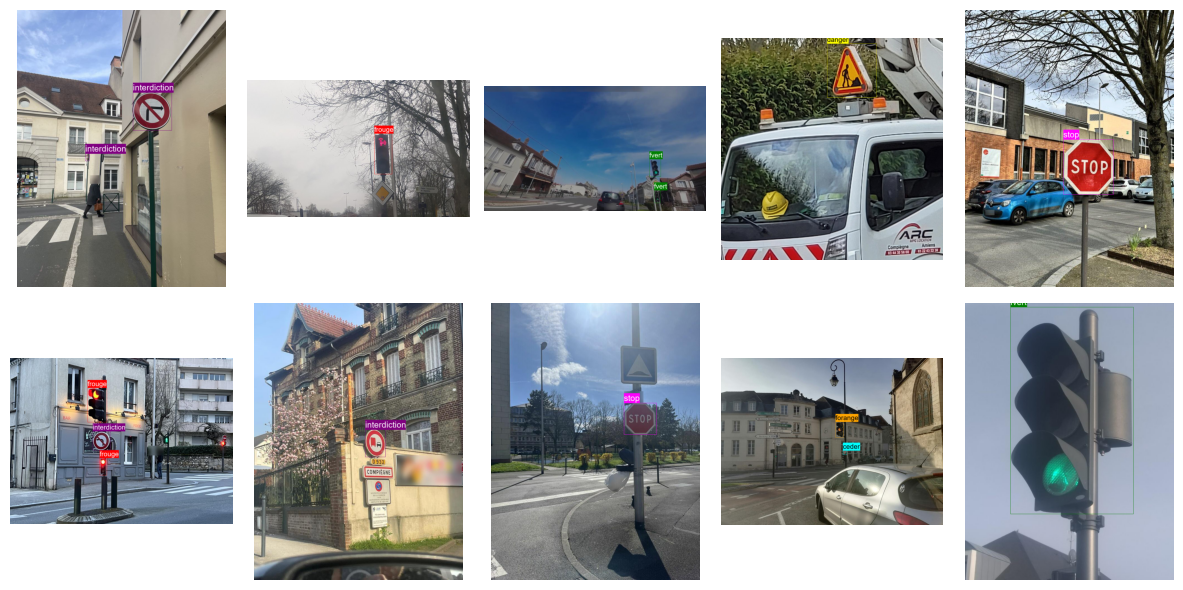

In [2]:
import os
import random
import matplotlib.pyplot as plt


# Affiche au hasard des images positives de l'ensemble d'apprentissage
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for ax in axs.ravel():
    images_dir = os.path.join("train", "images")
    labels_dir = os.path.join("train", "labels")
    image_name = random.choice(os.listdir(images_dir))
    image_path = os.path.join(images_dir, image_name)
    csv_path = os.path.join(labels_dir, image_name[:-4] + ".csv")   
    # Call visualize_image function to modify the image
    image_to_display = visualize_image(image_path, csv_path)
    
    # Display the modified image
    ax.imshow(image_to_display)
    ax.axis('off')
        
plt.tight_layout()
plt.show()


train\images\0001.jpg


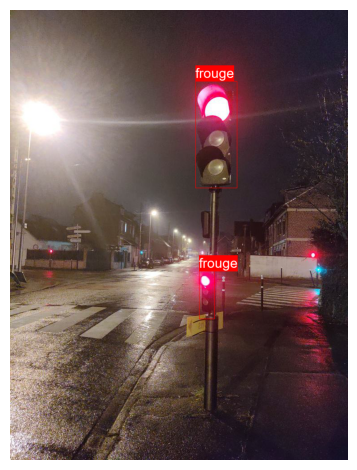

In [3]:
import os
import random
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1)

images_dir = os.path.join("train", "images")
labels_dir = os.path.join("train", "labels")
image_name = "0001.jpg"
image_path = os.path.join(images_dir, image_name)
print(image_path)
csv_path = os.path.join(labels_dir, image_name[:-4] + ".csv")   
    # Call visualize_image function to modify the image
image_to_display = visualize_image(image_path, csv_path)
    
    # Display the modified image
axs.imshow(image_to_display)
axs.axis('off')
        
plt.tight_layout()
plt.show()


# Preparation de la data

In [7]:
import os
import csv

def compter_panneaux(images_path, labels_path):
    # Dictionnaire pour compter les panneaux
    panneaux_count = {}

    # Liste des fichiers images
    image_files = [f for f in os.listdir(images_path) if f.endswith('.jpg')]

    # Parcourir chaque image
    for image_file in image_files:
        # Obtenir le nom de base sans l'extension
        base_name = os.path.splitext(image_file)[0]
        
        # Chemin vers le fichier label correspondant
        label_file = os.path.join(labels_path, base_name + '.csv')
        
        # Vérifier si le fichier label existe et n'est pas vide
        if os.path.exists(label_file) and os.path.getsize(label_file) > 0:
            # Lire le fichier CSV
            with open(label_file, 'r') as csvfile:
                csvreader = csv.reader(csvfile)
                # Parcourir chaque ligne du fichier CSV
                for row in csvreader:
                    if len(row) >= 5:  # Vérifier que la ligne a au moins 5 colonnes
                        # Supposons que la classe du panneau est dans la 5ème colonne (index 4)
                        class_name = row[4]
                        if class_name in panneaux_count:
                            panneaux_count[class_name] += 1
                        else:
                            panneaux_count[class_name] = 1

    # Afficher le résultat
    for panneau, count in panneaux_count.items():
        print(f"Nombre de panneaux '{panneau}' : {count}")

# Chemin vers le dossier des images et des labels
images_path = 'train/images'
labels_path = 'train/labels'

# Appeler la fonction
compter_panneaux(images_path, labels_path)


Nombre de panneaux 'frouge' : 81
Nombre de panneaux 'ceder' : 120
Nombre de panneaux 'interdiction' : 289
Nombre de panneaux 'fvert' : 94
Nombre de panneaux 'stop' : 100
Nombre de panneaux 'danger' : 155
Nombre de panneaux 'obligation' : 117
Nombre de panneaux 'empty' : 54
Nombre de panneaux 'forange' : 54
Nombre de panneaux 'ff' : 10


In [5]:
import csv
from PIL import Image

def update_coordinates_for_mirror(image_path, csv_path, new_image_path, new_csv_path):
    # Ouvrir l'image originale et obtenir sa largeur
    img = Image.open(image_path)
    width = img.width
    
    # Créer et sauvegarder l'image miroir
    mirrored_img = img.transpose(Image.FLIP_LEFT_RIGHT)
    mirrored_img.save(new_image_path)
    
    # Lire les coordonnées depuis l'ancien fichier CSV et mettre à jour
    with open(csv_path, mode='r') as infile, open(new_csv_path, mode='w', newline='') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)
        
        for row in reader:
            if row:  # Pour s'assurer que la ligne n'est pas vide
                # Extraire les coordonnées et le label
                x1, y1, x2, y2, label = row
                # Mettre à jour les coordonnées x
                new_x1 = width - int(x2)
                new_x2 = width - int(x1)
                # Écrire la nouvelle ligne dans le fichier CSV
                writer.writerow([new_x1, y1, new_x2, y2, label])

# Exemple d'utilisation

def afficherPanneauBox(image_path,csv_path) : 
    fig, axs = plt.subplots(1, 1)
    
    # Exemple d'utilisation
    
    image_to_display = visualize_image(image_path, csv_path)
    axs.imshow(image_to_display)
    axs.axis('off')
            
    plt.tight_layout()
    plt.show()



In [8]:
#Code pour rajouter class empty aux images sans panneaux, et pour corriger un stop mal orthographié
def add_empty_label_to_empty_csv_files(labels_path):
    # Liste des fichiers CSV dans le répertoire des labels
    csv_files = [f for f in os.listdir(labels_path) if f.endswith('.csv')]

    for csv_file in csv_files:
        csv_path = os.path.join(labels_path, csv_file)
        # Vérifie si le fichier est vide ou n'a que des nouvelles lignes
        with open(csv_path, 'r') as file:
            content = file.read().strip()

        if content == "" or content == "empty":
            with open(csv_path, 'w', newline='') as csvfile:
                csvwriter = csv.writer(csvfile)
                # Ajoute l'entrée "empty" dans le fichier CSV vide
                csvwriter.writerow(["X", "X", "X", "X", "empty"])
        else:
            # Vérifie et corrige l'annotation "Stop"
            with open(csv_path, 'r') as csvfile:
                csvreader = csv.reader(csvfile)
                rows = list(csvreader)
                for row in rows:
                    if len(row) > 4 and row[4] == "Stop":
                        row[4] = "stop"

            # Écrit les lignes corrigées dans le fichier CSV
            with open(csv_path, 'w', newline='') as csvfile:
                csvwriter = csv.writer(csvfile)
                csvwriter.writerows(rows)

#add_empty_label_to_empty_csv_files("train/labels")


In [9]:
import os
import csv
import shutil
from PIL import Image
import numpy as np

def add_noise(image):
    """ Ajouter du bruit gaussien à l'image. """
    img_array = np.array(image)
    noise = np.random.normal(loc=0.0, scale=25, size=img_array.shape)
    noisy_img_array = np.clip(img_array + noise, 0, 255)
    return Image.fromarray(noisy_img_array.astype('uint8'))

def mirror_image(image):
    """ Retourner l'image horizontalement. """
    return image.transpose(Image.FLIP_LEFT_RIGHT)

def update_csv(original_csv, new_csv, image_width):
    with open(original_csv, 'r') as infile, open(new_csv, 'w', newline='') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)
        for row in reader:
            if row:
                # Convertir les coordonnées en entiers
                x1, y1, x2, y2 = map(int, row[:-1])
                label = row[-1]

                # Mettre à jour les coordonnées pour l'image transposée
                new_x1 = image_width - x2
                new_x2 = image_width - x1

                # Écrire la nouvelle ligne dans le fichier CSV
                writer.writerow([new_x1, y1, new_x2, y2, label])


In [10]:
def process_images(image_folder, label_folder, target_image_folder, target_label_folder, target_labels):
    target_labels_set = set(target_labels)
    # Assurer que les dossiers cibles existent
    os.makedirs(target_image_folder, exist_ok=True)
    os.makedirs(target_label_folder, exist_ok=True)

    for filename in os.listdir(image_folder):
        image_path = os.path.join(image_folder, filename)
        label_path = os.path.join(label_folder, filename.replace('.jpg', '.csv'))
        target_image_path = os.path.join(target_image_folder, filename)
        target_label_path = os.path.join(target_label_folder, filename.replace('.jpg', '.csv'))

        # Copier toutes les images et fichiers CSV dans les nouveaux dossiers
        shutil.copy(image_path, target_image_path)
        shutil.copy(label_path, target_label_path)

        # Lire et vérifier les labels
        with open(label_path, 'r') as f:
            labels = [row[-1].lower() for row in csv.reader(f)]
        labels_set = set(labels)
        
        # Vérifier si l'image contient uniquement les panneaux cibles
        if labels_set <= target_labels_set:
            img = Image.open(image_path)
            mirrored_img = mirror_image(img)
            noisy_img = add_noise(mirrored_img)
            noisy_img.save(os.path.join(target_image_folder, filename.replace('.jpg', '_bis.jpg')))
            
            new_csv_path = os.path.join(target_label_folder, filename.replace('.jpg', '_bis.csv'))
            update_csv(label_path, new_csv_path, img.width)

In [11]:
image_folder = 'train/images'
label_folder = 'train/labels'
new_image_folder = 'train/images2'
new_label_folder = 'train/labels2'
target_labels = ['frouge', 'forange', 'fvert', 'stop', 'obligation', 'ceder']

# Exécuter le processus
#process_images(image_folder, label_folder, new_image_folder, new_label_folder, target_labels)

In [ ]:
import os
import csv
import numpy as np
from PIL import Image

def add_noise(image):
    """Ajouter du bruit gaussien à l'image."""
    img_array = np.array(image)
    noise = np.random.normal(loc=0.0, scale=25, size=img_array.shape)
    noisy_img_array = np.clip(img_array + noise, 0, 255)
    return Image.fromarray(noisy_img_array.astype('uint8'))

def mirror_image(image):
    """Retourner l'image horizontalement."""
    return image.transpose(Image.FLIP_LEFT_RIGHT)

def update_csv_coordinates(original_coordinates, image_width):
    new_coordinates = []
    for row in original_coordinates:
        if row:
            x1, y1, x2, y2 = map(int, row[:-1])
            label = row[-1]

            # Mettre à jour les coordonnées pour l'image transposée
            new_x1 = image_width - x2
            new_x2 = image_width - x1

            new_coordinates.append([new_x1, y1, new_x2, y2, label])
    return new_coordinates

def process_images_in_memory(image_folder, label_folder, target_labels):
    target_labels_set = set(target_labels)
    processed_images = []
    processed_labels = []

    for filename in os.listdir(image_folder):
        image_path = os.path.join(image_folder, filename)
        label_path = os.path.join(label_folder, filename.replace('.jpg', '.csv'))

        # Lire et vérifier les labels
        with open(label_path, 'r') as f:
            labels = [row[-1].lower() for row in csv.reader(f)]
        labels_set = set(labels)
        
        # Vérifier si l'image contient uniquement les panneaux cibles
        if labels_set <= target_labels_set:
            img = Image.open(image_path)
            mirrored_img = mirror_image(img)
            noisy_img = add_noise(mirrored_img)
            image_data = np.array(noisy_img)

            # Lire les coordonnées d'origine
            with open(label_path, 'r') as f:
                original_coordinates = list(csv.reader(f))

            # Mettre à jour les coordonnées
            new_coordinates = update_csv_coordinates(original_coordinates, img.width)
            
            # Stocker l'image traitée et les nouvelles coordonnées
            processed_images.append((filename.replace('.jpg', '_bis.jpg'), image_data))
            processed_labels.append((filename.replace('.jpg', '_bis.csv'), new_coordinates))

    return processed_images, processed_labels

# Pour tester et afficher les résultats en mémoire
def display_processed_data(processed_images, processed_labels):
    # Afficher les noms des fichiers des images traitées
    for img_name, img_data in processed_images:
        print(f"Image: {img_name}")
        img = Image.fromarray(img_data)
        img.show()

    # Afficher les noms des fichiers des labels traités et leur contenu
    for label_name, coordinates in processed_labels:
        print(f"Label: {label_name}")
        for coordinate in coordinates:
            print(coordinate)

image_folder = 'train/images'
label_folder = 'train/labels'
target_labels = ['frouge', 'forange', 'fvert', 'stop', 'obligation', 'ceder','danger']

# Exécuter le processus
processed_images, processed_labels = process_images_in_memory(image_folder, label_folder, target_labels)

# Afficher les résultats traités en mémoire
display_processed_data(processed_images, processed_labels)


Image: 0001_bis.jpg
Image: 0002_bis.jpg
Image: 0005_bis.jpg
Image: 0007_bis.jpg
Image: 0008_bis.jpg
Image: 0011_bis.jpg
Image: 0012_bis.jpg
Image: 0013_bis.jpg
Image: 0015_bis.jpg


# Classification